In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import make_regression

X, y = make_regression(n_samples = 1000, n_features = 2, n_targets = 1, noise = 3.0) 

<Axes: xlabel='0', ylabel='1'>

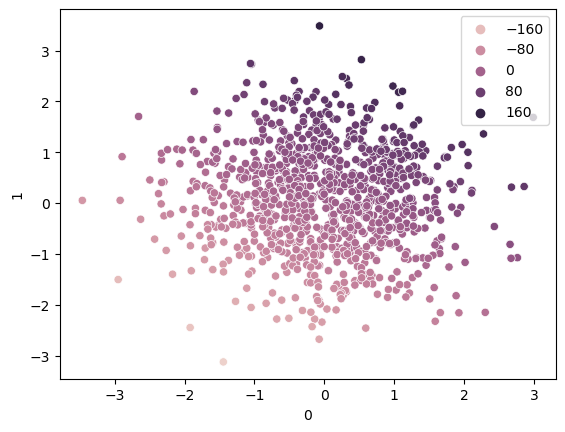

In [3]:
sns.scatterplot(x = pd.DataFrame(X)[0], y = pd.DataFrame(X)[1], hue = y)

In [5]:
from sklearn.model_selection import train_test_split as tts

X_train, X_test, y_train, y_test = tts(X, y, test_size = 0.25, random_state = 10)

In [8]:
from sklearn.svm import SVR

svr = SVR(kernel = 'linear')
svr.fit(X_train, y_train)
print("Coefficient or Slope:", svr.coef_)

Coefficient or Slope: [[28.81443596 47.84470023]]


In [9]:
y_test_prediction = svr.predict(X_test)

In [11]:
from sklearn.metrics import r2_score

print(r2_score(y_test, y_test_prediction))

0.9962399099498773


## Hyper-parameter Tunning

In [13]:
params = {
    'C' : [0.1, 1, 10,  100, 1000],
    'gamma' : [1, 0.1, 0.01, 0.001, 0.0001],
    'kernel' : ['linear'],
    'epsilon' : [0.1, 0.2, 0.3]
}

In [16]:
from sklearn.model_selection import GridSearchCV

gscv = GridSearchCV(SVR(), param_grid = params, scoring = 'neg_mean_squared_error', refit = True, cv = 5, verbose = 3)
gscv.fit(X_train, y_train)
y_test_prediction = gscv.predict(X_test)

print("Best Parameters:", gscv.best_params_)

Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV 1/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=-107.164 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=-104.095 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=-80.958 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=-159.016 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=-121.414 total time=   0.0s
[CV 1/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=-107.164 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=-104.095 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=-80.958 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=-159.016 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=-121.414 total time=   0.0s
[CV 1/5] E

In [17]:
print(r2_score(y_test, y_test_prediction))

0.9962814165935967
